In [1]:
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
data = fits.open('data_gtc_osiris/0002672523-20200911-OSIRIS-OsirisCalibrationLamp.fits')[1]

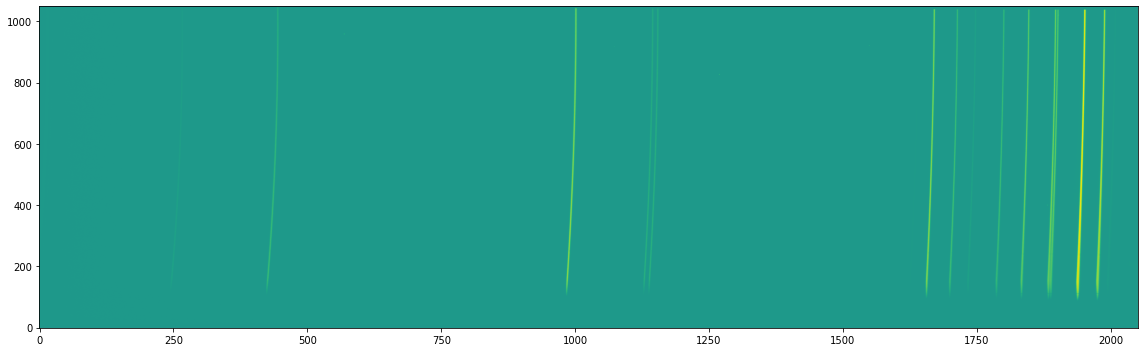

In [3]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')
plt.tight_layout()

In [4]:
spectrum = np.median(data.data.T[550:570], axis=0)

peaks, _ = find_peaks(spectrum, height=1250, prominence=20, distance=3, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

INFO:rascal.calibrator:num_pix is set to None.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.
INFO:rascal.calibrator:num_pix is set to 2051.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.


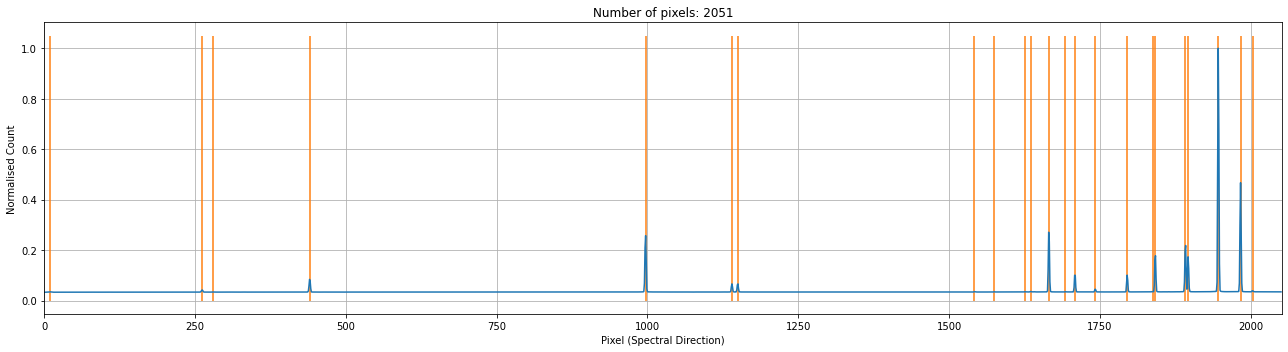

In [5]:
c = Calibrator(peaks_refined, spectrum)

c.set_calibrator_properties(num_pix=len(spectrum),
                            plotting_library='matplotlib',
                            log_level='info') 

c.plot_arc()

In [6]:
atlas = [
    3650.153, 4046.563, 4077.831, 4358.328, 5460.735, 5769.598, 5790.663,
    6682.960, 6752.834, 6871.289, 6965.431, 7030.251, 7067.218, 7147.042,
    7272.936, 7383.981, 7503.869, 7514.652, 7635.106, 7723.98
]
element = ['HgAr'] * len(atlas)

In [7]:
c.set_hough_properties(num_slopes=2000,
                       xbins=100,
                       ybins=100,
                       min_wavelength=3500.,
                       max_wavelength=8000.,
                       range_tolerance=500.,
                       linearity_tolerance=50)

c.load_user_atlas(elements=element,
                  wavelengths=atlas,
                  constrain_poly=True)

c.set_ransac_properties(sample_size=5,
                        top_n_candidate=5,
                        linear=True,
                        filter_close=True,
                        ransac_tolerance=5,
                        candidate_weighted=True,
                        hough_weight=1.0)

c.do_hough_transform()

INFO:rascal.calibrator:Peak at: 3650.115449538473 A
INFO:rascal.calibrator:- matched to 3650.153 A
INFO:rascal.calibrator:Peak at: 4046.8620798203365 A
INFO:rascal.calibrator:- matched to 4046.563 A
INFO:rascal.calibrator:Peak at: 4077.595238720406 A
INFO:rascal.calibrator:- matched to 4077.831 A
INFO:rascal.calibrator:Peak at: 4358.576445488649 A
INFO:rascal.calibrator:- matched to 4358.328 A
INFO:rascal.calibrator:Peak at: 5460.7567985483165 A
INFO:rascal.calibrator:- matched to 5460.735 A
INFO:rascal.calibrator:Peak at: 5769.381771912414 A
INFO:rascal.calibrator:- matched to 5769.598 A
INFO:rascal.calibrator:Peak at: 5790.674908711722 A
INFO:rascal.calibrator:- matched to 5790.663 A
INFO:rascal.calibrator:Peak at: 6677.195577604758 A
INFO:rascal.calibrator:Peak at: 6753.169173651684 A
INFO:rascal.calibrator:- matched to 6752.834 A
INFO:rascal.calibrator:Peak at: 6871.881456822988 A
INFO:rascal.calibrator:- matched to 6871.289 A
INFO:rascal.calibrator:Peak at: 6894.527274171375 A
INF

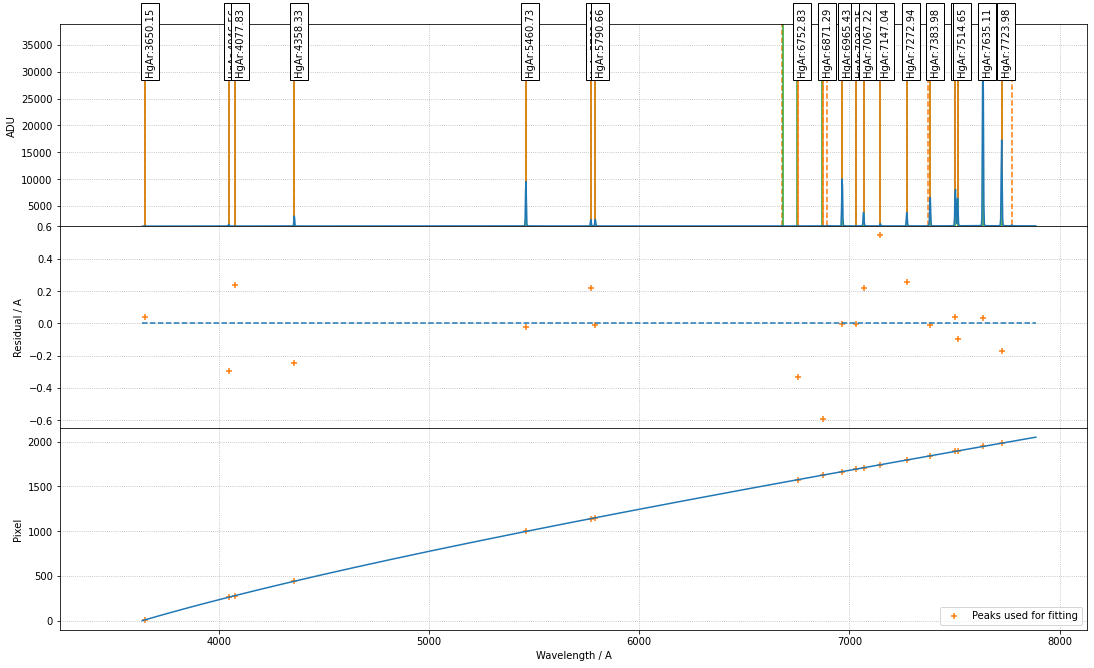

RMS: 0.263069686012686
Stdev error: 0.1791648865435056 A
Peaks utilisation rate: 80.0%


In [8]:
fit_coeff, rms, residual, peak_utilisation = c.fit(max_tries=200, fit_tolerance=10., fit_deg=4)

c.plot_fit(fit_coeff,
           plot_atlas=True,
           log_spectrum=False,
           tolerance=5.)

print("RMS: {}".format(rms))
print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

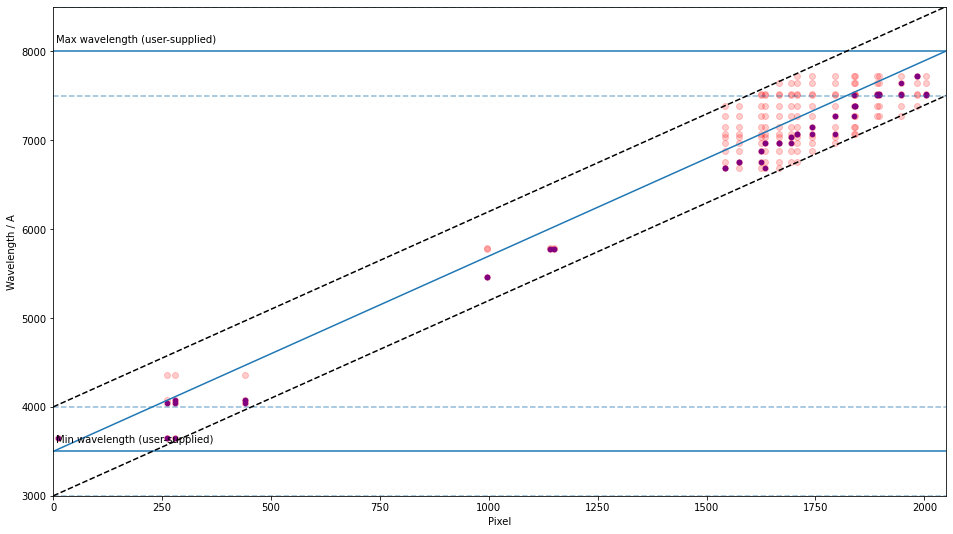

In [9]:
c.plot_search_space()